# Medical Cost Visualization and Transformation 

### Loading the dplyr and ggplot2 packages

Before you can work with the insurance data set, you will need to load the R package that contains the tools for working with it.

Use the library() function to load the package. In this case, we have loaded the dplyr and ggplot2 packages for you.

In [35]:
# Load the dplyr and ggplot2 packages
library(dplyr)
library(ggplot2)
print('Packages Loaded')

[1] "Packages Loaded"


In [36]:
insurance = read.csv('insurance.csv')

In [37]:
# Look at the insurance data set
head(insurance)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


### Understanding insurance data set

Now that we have loaded the insurance data set, you can start examining and understanding it.

How many observations (rows) are in the data set?

In [38]:
#your code here


How many variables (columns) are in the data set?

In [40]:
#your code here

How many unique regions are in the insurance data set?

In [42]:
#your code here


What is the mean insurance cost for all the individuals in the data set?
- Note: The insurance cost is listed under the 'charges' column.

In [44]:
#your code here


### Data Preproccesing 

It will benefit us to group the insurance cost data into a new variable that is grouped into 'High', 'Medium', and 'Low', in reference to cost.

First, let us get a basic summary of the charges variable in order to better understand it.

In [46]:
summary(insurance$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

After looking at the charges variable it makes sense to divide the groups as all rows with charges less than 5000 will be categorized as 'Low'. All rows with charges greater than 5000 and less than 15000 will be categorized as 'Medium', and all rows with charges greater than 15000 will be categorized as 'High'.

Below, I used the mutate function and an if else statement to achieve this.

In [47]:
insurance = insurance %>% 
    mutate(charges_grouped = if_else(charges < 5000, 'Low', if_else(charges < 15000, 'Medium', 'High')))

As you can see, the 'charges_grouped' variable has been added, grouped according to the charges. 

In [48]:
head(insurance)

age,sex,bmi,children,smoker,region,charges,charges_grouped
19,female,27.900,0,yes,southwest,16884.924,High
18,male,33.770,1,no,southeast,1725.552,Low
28,male,33.000,3,no,southeast,4449.462,Low
33,male,22.705,0,no,northwest,21984.471,High
32,male,28.880,0,no,northwest,3866.855,Low
31,female,25.740,0,no,southeast,3756.622,Low


In [49]:
summary(insurance)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges      charges_grouped   
 northeast:324   Min.   : 1122   Length:1338       
 northwest:325   1st Qu.: 4740   Class :character  
 southeast:364   Median : 9382   Mode  :character  
 southwest:325   Mean   :13270                     
                 3rd Qu.:16640                     
                 Max.   :63770                     

# Problem 1

Let us start by doing some basic data exploration using methods we learned in labs 3 and 4. 

#### Instructions

It would be interesting to find out whether there is a mean difference in insurance cost based on gender. As we have learned in previous labs, there are multiple ways to approach this question. 

First, let us find the mean charges by gender using the group_by() and summarize() funciton. It is beneficial to get the most information out of our functions. More than one function can be added to the summarize() function. In this case I added the n() function which provides a count of all individuals in the grouping and the mean() function to calculate the mean charges in each group.   

Let us make the name of the charges column 'mean_charges' and the count column 'count'. 

In [50]:
insurance %>% group_by(sex) %>% summarize(mean_charges = mean(charges), count = n())

sex,mean_charges,count
female,12569.58,662
male,13956.75,676


As we can see, the mean charges are very similar for males and females. Also, each group is very similar in size. There are 662 females and 676 males in the data set. 

The above method is not the only way to figure out if there is a difference in insurance cost based on gender. 

Let us use a ggplot2 visualization to answer the same question. A geom_boxplot() function would work great for comparing the mean insurance cost of males and females side by side.

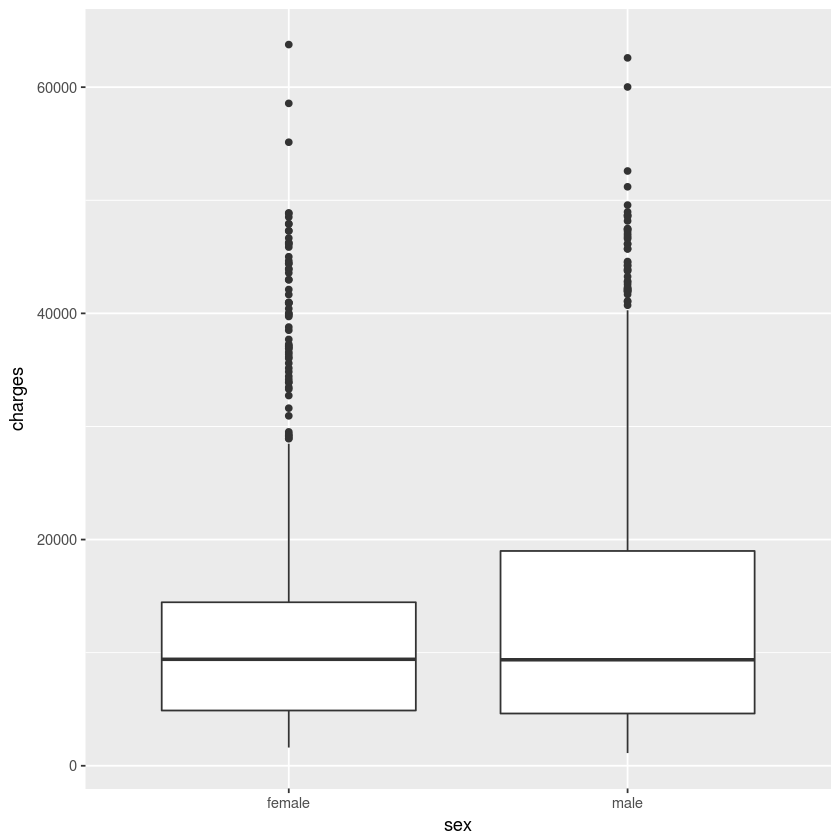

In [51]:
ggplot(data = insurance, mapping = aes(x = sex, y = charges)) +
geom_boxplot()

From this boxplot we can see that the mean charges for males and females are very close, accomplishing the same result as the first method. 

#### Question 1

On your own you will explore the smoker variable. Do you think that someone who smokes will have a higher mean insurance cost than someone who does not? Write R code to answer this question. 

Find the mean charges by smoker using the group_by() and summarize() funciton. Use the n() function to display a count of smokers and non smokers. 

In [52]:
#your code here

#### Question 2

Use the geom_boxplot() function to find the mean charges by smoker type. 

In [54]:
#your code here

#### Question 3

Now that you have used the two methods to analyze the data, what conclusion can you make about smokers vs non smokers? 

In [56]:
#your conclusion here


# Problem 2

As we learned from Problem 1, smoking impacts the cost of your health insurance. Whether or not you are a smoker is an important piece of information to insurance companies when assessing your overall health. Do you think that someone who smokes will have a higher mean BMI than someone who does not? Use the methods from Problem 1 to answer this question.

#### Question 1

Find the mean BMI by smoker using the group_by() and summarize() funciton. 

In [58]:
#your code here


#### Question 2

Use the geom_boxplot() function to find the mean BMI by smoker type.

In [60]:
#your code here


#### Question 3

Now that you have used the two methods to analyze the data, what conclusion can you make about the BMI of smokers vs non smokers? 

In [62]:
#your conclusion here


# Problem 3

In Problem 3, we are going to perform further exploration on the data set using advanced group_by() and visualization techniques. In Problem 1, we looked at the mean insurance cost by gender. Now, let us use different techniques to count the number of individuals per gender group that has ‘Low’, ‘Medium’, and ‘High’ charges. Initially, you may think to use the filter() function to create a new data set with just males and then use a groupby() and summarize function to count the number of charge types ('Low', 'Medium', 'High) for males, and repeat the same for females. But, now that you are on yor way to becoming a data scientist, efficiency is key. There is a simple way to explore the groups within a group using the groupby() function. 

#### Instructions 

Below I counted up the number of individuals in each group of charges_grouped ('Low', 'Medium', 'High) within each gender group ('male','female'). 
- Note: Notice how 'charges_grouped' is included in the groupby() function seperated by a comma.
- Note: The function 'n()' is used as a simple count function, placed in the summarize function. We simply named it 'count'.

In [64]:
insurance %>% group_by(sex, charges_grouped) %>% summarize(count = n())

sex,charges_grouped,count
female,High,159
female,Low,173
female,Medium,330
male,High,199
male,Low,186
male,Medium,291


The information above is good, but in data science you are always asking the question: "How can I make it better?". Let us use the mutate() function to add a column that calculates the percentage of each charge group inside the respective gender group.
- Note: An example of how the following is calculated, there are 662 females in the data set as we have learned in Problem 1. There are 330 females with 'Medium' charges grouped, therefore, the percentage is calculated by 330/662 = .4984894.

In [65]:
insurance %>% group_by(sex, charges_grouped) %>% summarize(count = n()) %>% mutate(percentage = count/sum(count))

sex,charges_grouped,count,percentage
female,High,159,0.2401813
female,Low,173,0.2613293
female,Medium,330,0.4984894
male,High,199,0.2943787
male,Low,186,0.2751479
male,Medium,291,0.4304734


The above table provides all the information in a single view.

Let us use the ggplot2 functions to explore the data. This problem deals with counts, therefore it would be appropriate to use a geom_bar() function. The geom_bar() function has a 'fill' option which allows you to group data within each bar using different colors. The 'fill' option is thus very useful in visualizing data grouped by gender.

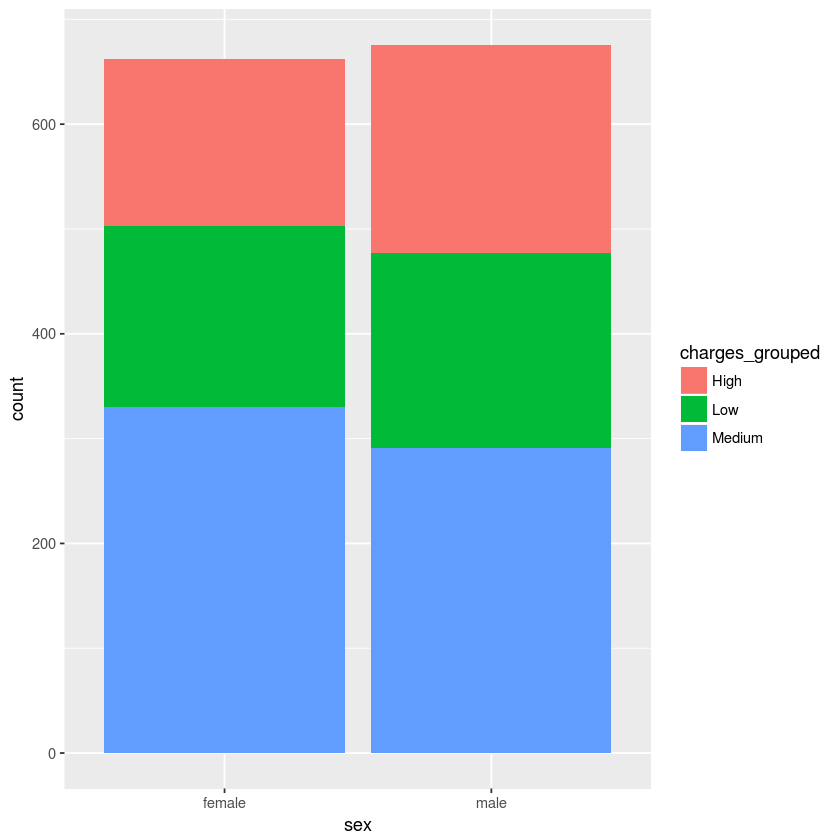

In [66]:
ggplot(data = insurance) + 
  geom_bar(mapping = aes(x = sex, fill = charges_grouped))

This visualization above allows us to easily compare the distributions of the charges grouped ('Low', 'Medium', 'High) by gender.

#### Question 1

On your own use the groupby() and summarize() function to count the number of individuals per smoker group that has ‘Low’, ‘Medium’, and ‘High’ charges.

In [67]:
#your code here


#### Question 2

Use the groupby() and summarize() function to count the number of individuals per smoker group that has ‘Low’, ‘Medium’, and ‘High’ charges. But, this time add percentages to the respective groups using the mutate() function.

In [69]:
#your code here


#### Question 3

Use the geom_bar() function to vizualize whether or not there is a compelling difference in the charges ('Low', 'Medium', 'High) grouped by smoker.
- Note: The fill function will be necessary for this.

In [71]:
#your code here


#### Question 4

What conclusion can you make about the number of individuals per smoker group that has ‘Low’, ‘Medium’, and ‘High’ charges?

In [73]:
#your conclusion here


# Problem 4

Another variable that may have a influence on insurance cost is the number of dependents/children an individual has. Do you think that that individuals with more children will have higher the insurance costs? Using the skills you practiced before answer this question.

#### Question 1

Find the mean charges by number of children using the group_by() and summarize() funciton. Use the count n() function to count the number of individuals in each group. Add percentages to the respective groups using the mutate() function. 
- Note: Notice the number of individuals in each group. Is it reasonable to make any assumptions when the number of individuals in the group is small?

In [75]:
#your code here


#### Question 2

Use the geom_bar() function to vizualize whether or not there is a compelling difference in the charges grouped by number of children.
- Note: The fill function will be necessary for this.

In [77]:
#your code here


#### Question 3

Now that you have analyzed the data, what conclusion can you make about the number of dependents an individual has and insurance cost?

In [79]:
#your conclusion here


# Problem 5 

Lastly, you will be looking at the numeric variable 'age'. Use R code to find the mean age in each charge grouped ('Low', 'Medium', 'High). 

#### Question 1

Use the groupby() and summarize() function to find the mean age for each grouped charge.

In [81]:
#your code here


#### Question 2

Now, let us visualize the data. Use the geom_boxplot() function to find the mean age by each charge grouped.

In [83]:
#your code here


#### Question 3

Now that you have used the two methods to analyze the data, what conclusion can you make about the mean age in each charge grouped ('Low', 'Medium', 'High).

In [85]:
#your conclusion here


<hr>
#### For an .ipynb file of this lab follow <a href="https://github.com/anthonyiarussi/Introduction-to-Data-Science/tree/master/Student%20Labs/Labs%20.ipynb/Lab5" target="_blank">this link</a>.

#### For a .Rmd file of this lab follow <a href="https://github.com/anthonyiarussi/Introduction-to-Data-Science" target="_blank">this link</a>.
<hr>
#### Go to the <a href="https://github.com/anthonyiarussi/Introduction-to-Data-Science" target="_blank">GitHub repository</a>, where you can download a copy of the lab for yourself!